In [1]:
!pip install numpy

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
ds = pd.read_csv(r'C:\Users\Durga Bhavani\Downloads\Comcast_telecom_complaints_data.csv')

In [4]:
ds.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-2015,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-2015,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-2015,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-2015,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-2015,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [5]:
ds.describe()

,Zip code
count,2224.000000
mean,47994.393435
std,28885.279427
min,1075.000000
25%,30056.500000
50%,37211.000000
75%,77058.750000
max,99223.000000


In [6]:
ds["Date_month_year"]=pd.to_datetime(ds["Date_month_year"])
ds["Month"]=ds["Date_month_year"].dt.month
ds["day"]=ds["Date_month_year"].dt.day

x=ds["Month"].value_counts()

In [7]:
x

6     1046
4      375
5      317
8       67
12      65
2       59
9       55
1       55
10      53
7       49
3       45
11      38
Name: Month, dtype: int64

In [26]:
Monthwise_data = pd.DataFrame(x)
Monthwise_data
Monthwise_data.rename(columns = {'Month':'Frequency'},inplace = True)
Monthwise_data['Months'] = Monthwise_data.index
Monthwise_data.reset_index(drop = True, inplace = True)
Monthwise_data.sort_values('Months',inplace = True)
Monthwise_data

,Frequency,Months
7,55,1
5,59,2
10,45,3
1,375,4
2,317,5
0,1046,6
9,49,7
3,67,8
6,55,9
8,53,10


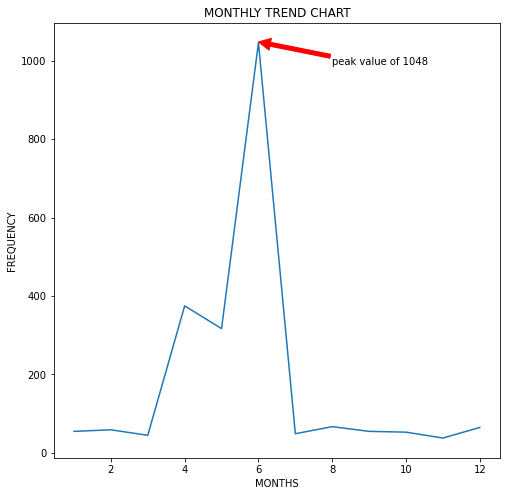

In [27]:
plt.figure(figsize=(8,8))
plt.plot(Monthwise_data["Months"],Monthwise_data["Frequency"])
plt.xlabel("MONTHS")
plt.ylabel("FREQUENCY")
plt.title("MONTHLY TREND CHART")
plt.annotate("peak value of 1048",(6,1048),(8,990),arrowprops={"color":"red"})
plt.show()

In [28]:
y = ds['day'].value_counts()

In [33]:
datewise_data = pd.DataFrame(y)
datewise_data.rename(columns = {'day':'frequency1'},inplace = True)
datewise_data['day'] = datewise_data.index
datewise_data.reset_index(drop = True, inplace = True)
datewise_data.sort_values('day',inplace = True)

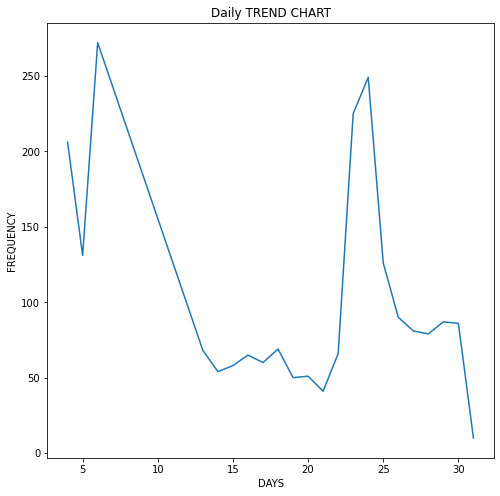

In [36]:
plt.figure(figsize=(8,8))
plt.plot(datewise_data['day'],datewise_data["frequency1"])
plt.xlabel("DAYS")
plt.ylabel("FREQUENCY")
plt.title("Daily TREND CHART")
plt.show()

In [37]:
ds['new_status'] = ds['Status'].replace({'solved':'closed', 'pending':'open' })

In [38]:
ds.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Month,day,new_status
0,250635,Comcast Cable Internet Speeds,22-04-2015,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,4,22,Closed
1,223441,Payment disappear - service got disconnected,04-08-2015,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,8,4,Closed
2,242732,Speed and Service,18-04-2015,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,4,18,Closed
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-2015,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,7,5,Open
4,307175,Comcast not working and no service to boot,26-05-2015,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,5,26,Solved


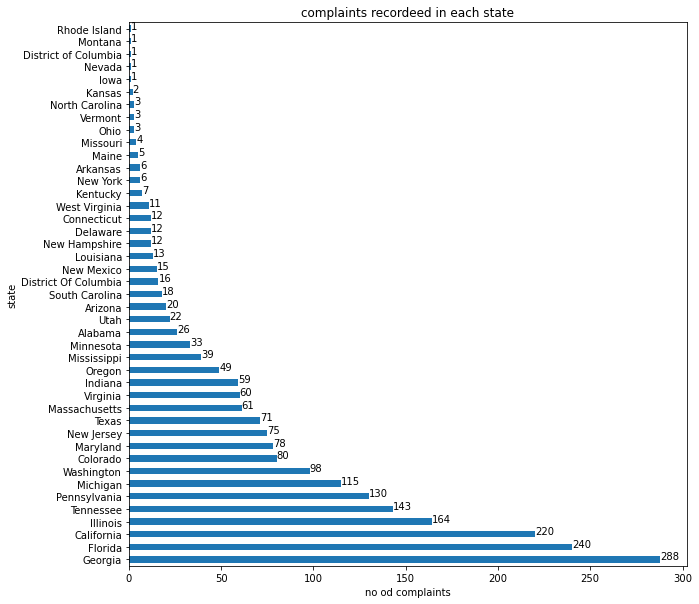

In [41]:
ds['State'].value_counts().plot(kind = 'barh', figsize = (10,10))
plt.xlabel("no od complaints")
plt.ylabel("state")
plt.title("complaints recordeed in each state")
for index,value in enumerate(ds['State'].value_counts()):
    plt.text(value,index,str(value))
plt.show()

In [48]:
unresolved_complaints = ds[ds.new_status == 'Open']
statelist = unresolved_complaints['State'].value_counts()

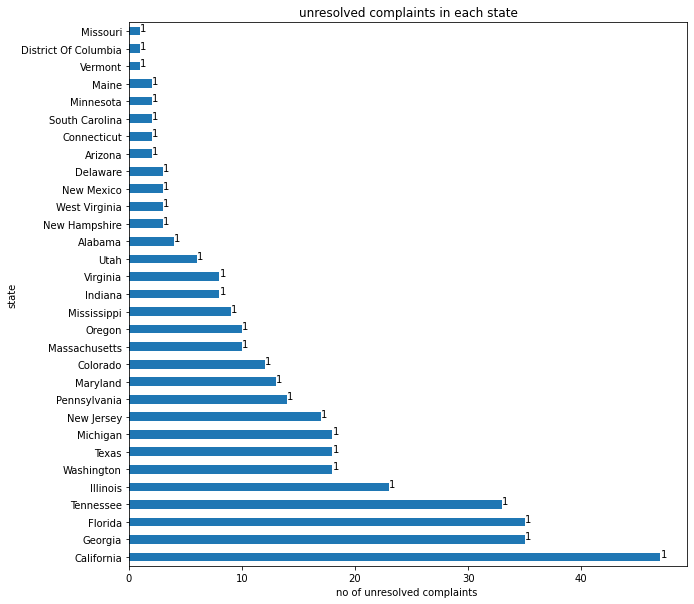

In [49]:
statelist.plot(kind = 'barh', figsize = (10,10))
plt.xlabel("no of unresolved complaints ")
plt.ylabel("state")
plt.title("unresolved complaints in each state")
for index,Value in enumerate(statelist):
    plt.text(Value,index,str(value))
plt.show()

In [50]:
resolved_complaints = ds[ds.new_status == 'Closed']
statelist1 = unresolved_complaints['State'].value_counts()

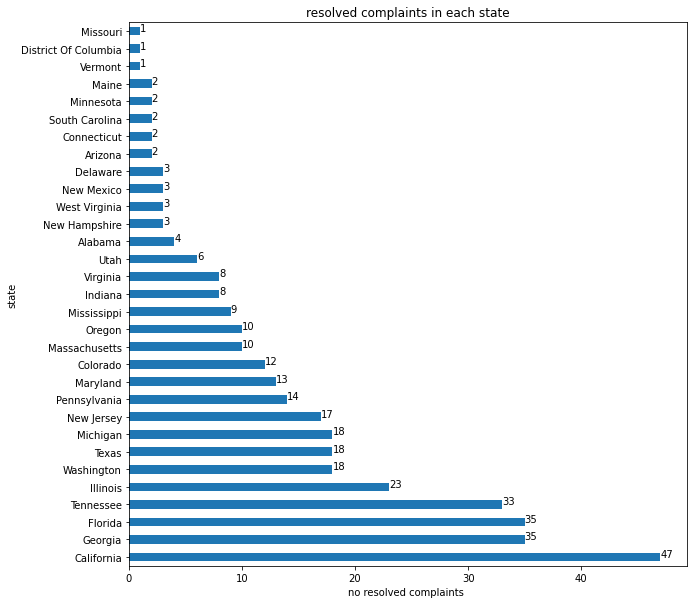

In [51]:
statelist1.plot(kind = 'barh', figsize = (10,10))
plt.xlabel("no resolved complaints ")
plt.ylabel("state")
plt.title("resolved complaints in each state")
for index,value in enumerate(statelist1):
    plt.text(value,index,str(value))
plt.show()

In [52]:
complaint_types = ds['Customer Complaint'].value_counts()
complaint_type_list = pd.DataFrame(complaint_types)
complaint_type_list.rename(columns = {'Customer Complaint':'count'},inplace = True)
complaint_type_list['Customer Complaint'] = complaint_type_list.index
complaint_type_list.reset_index(drop = True, inplace = True)
complaint_type_list.head()

,count,Customer Complaint
0,83,Comcast
1,18,Comcast Internet
2,17,Comcast Data Cap
3,13,comcast
4,11,Comcast Data Caps


In [53]:
s1 = pd.DataFrame(statelist)
s1.rename(columns = {'State':'F1'},inplace = True)
s2 = pd.DataFrame(statelist1)
s2.rename(columns = {'State':'F2'},inplace = True)

In [54]:
statelist3 = pd.concat([s1,s2],axis = 1)
statelist3.rename(columns = {'State':'F1'},inplace = True)
statelist3['State'] = statelist3.index
statelist3.reset_index(drop = True, inplace = True)
statelist3.head()

,F1,F2,State
0,47,47,California
1,35,35,Georgia
2,35,35,Florida
3,33,33,Tennessee
4,23,23,Illinois
